In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

   hours_studied  sleep_hours  social_media_hours  exam_score  result
0              1            6                   4          50       0
1              2            7                   3          60       1
2              3            5                   5          55       0
3              4            8                   2          70       1
4              5            6                   6          65       1


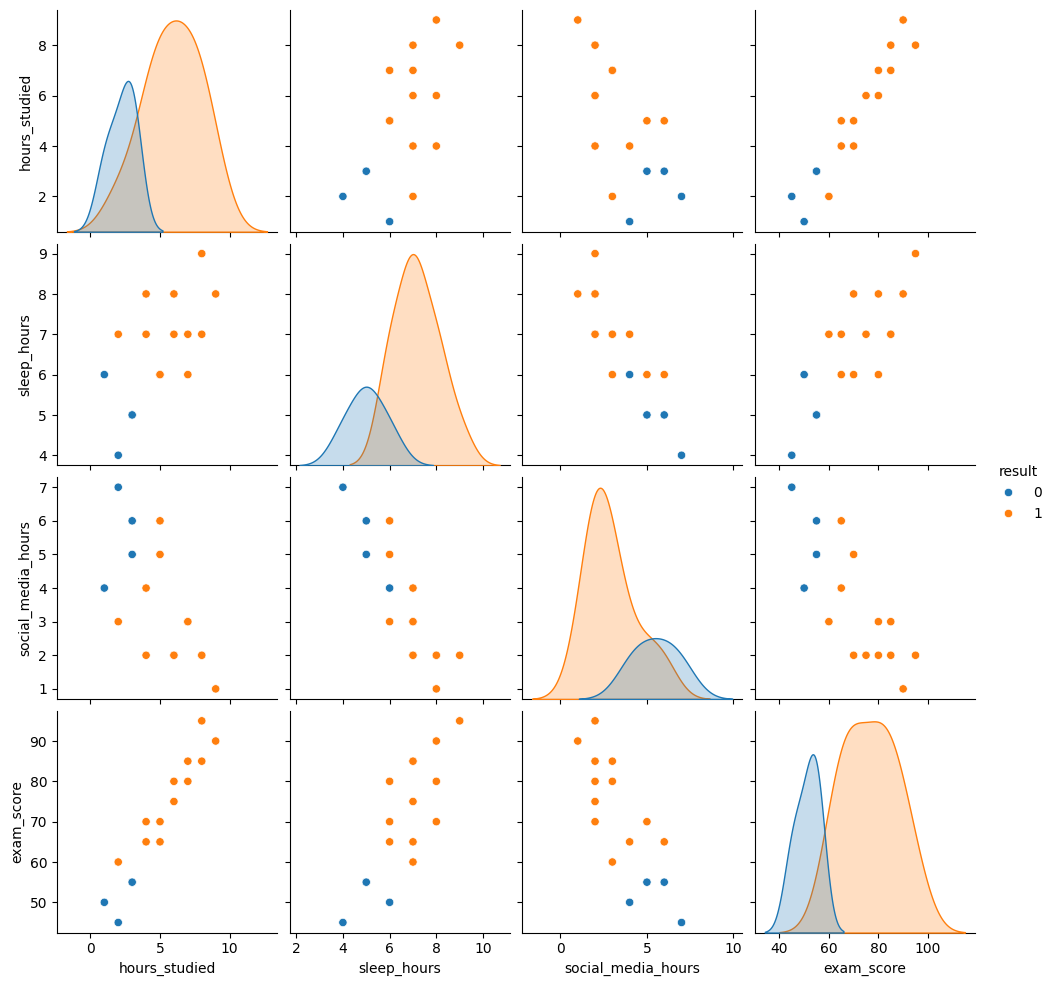

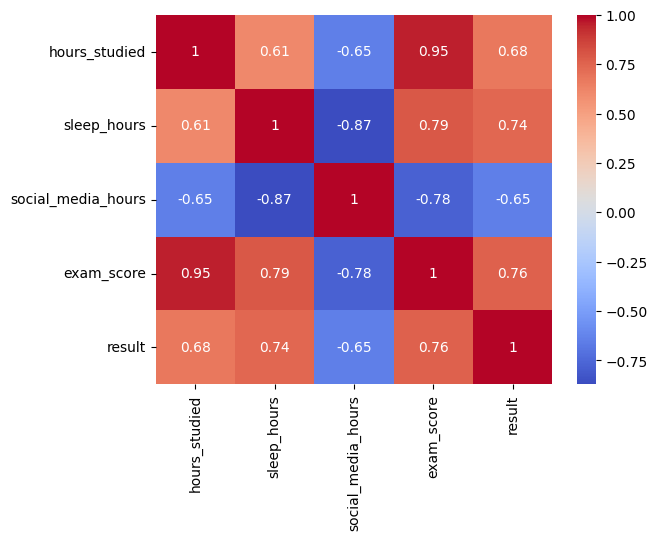

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Prediction: Pass ✅


In [2]:
data = {
    "hours_studied": [1,2,3,4,5,6,2,7,8,9,3,4,5,6,7,8],
    "sleep_hours":   [6,7,5,8,6,7,4,6,7,8,5,7,6,8,7,9],
    "social_media_hours": [4,3,5,2,6,2,7,3,2,1,6,4,5,2,3,2],
    "exam_score":    [50,60,55,70,65,75,45,80,85,90,55,65,70,80,85,95]
}

df = pd.DataFrame(data)

df["result"] = df["exam_score"].apply(lambda x: 1 if x >= 60 else 0)

print(df.head())

sns.pairplot(df, hue="result")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

X = df[["hours_studied", "sleep_hours", "social_media_hours"]]
y = df["result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

sample_input = pd.DataFrame({
    "hours_studied": [5],
    "sleep_hours": [7],
    "social_media_hours": [2]
})

prediction = model.predict(sample_input)[0]
print("Prediction:", "Pass ✅" if prediction == 1 else "Fail ❌")
